In [1]:
# Price Predictor

In [2]:
import pandas as pd

In [3]:
housing=pd.read_csv("C:/Users/HP/OneDrive/Desktop/ML/Book1.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.00
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.01
2,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.02
3,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.03
4,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.04


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.563443,11.737154,10.616897,0.069170,0.561588,6.342117,69.118182,3.604920,9.128458,410.031621,17.996245,358.584348,11.713794,22.938162
std,8.619840,21.331520,7.300887,0.253994,0.111723,0.688035,26.076800,1.932432,9.012494,166.579601,2.287894,91.205966,7.250367,8.943139
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.050650,0.000000,3.440000,0.000000,0.488000,5.951250,52.525000,2.100175,3.000000,296.000000,15.300000,376.712500,5.260000,17.800000
50%,0.191030,0.000000,9.690000,0.000000,0.538000,6.372500,71.450000,3.207450,5.000000,330.000000,18.500000,392.825000,9.845000,22.550000
75%,3.677082,18.000000,18.100000,0.000000,0.624000,6.575000,92.900000,4.100100,24.000000,666.000000,20.200000,396.900000,16.112500,24.617500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

In [10]:
#Train test splitting
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
# train_set,test_set=split_train_test(housing,0.2)

In [12]:
# print(f"Rows in train set: {len(train_set)}\n Rows in  test set: {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\n Rows in  test set: {len(test_set)}\n")

Rows in train set: 404
 Rows in  test set: 102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
housing=strat_train_set.copy()

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
#Looking for correlations

corr_matrix=housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.671739
B          0.376603
ZN         0.347750
DIS        0.257340
CHAS       0.200442
AGE       -0.351310
RAD       -0.400304
CRIM      -0.418354
NOX       -0.442392
INDUS     -0.476213
PTRATIO   -0.477772
TAX       -0.492571
LSTAT     -0.714606
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

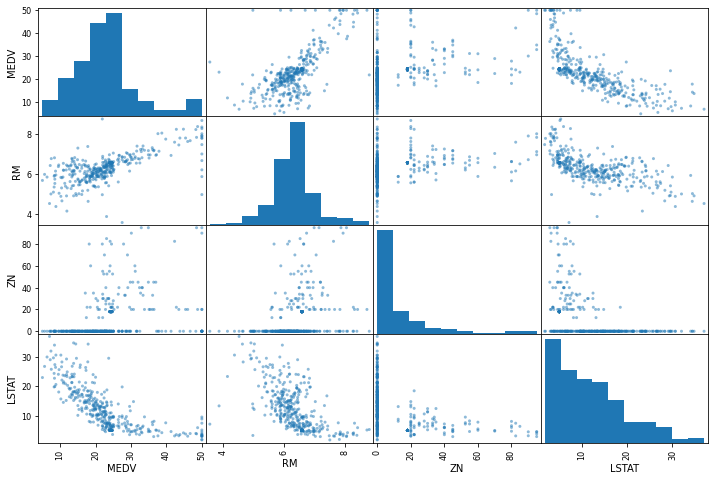

In [20]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

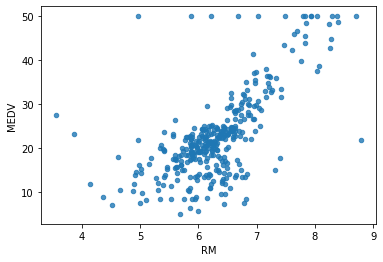

In [21]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [22]:
##Attribute combinations

housing["TAXRM"]=housing['TAX']/housing['RM']

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.671739
B          0.376603
ZN         0.347750
DIS        0.257340
CHAS       0.200442
AGE       -0.351310
RAD       -0.400304
CRIM      -0.418354
NOX       -0.442392
INDUS     -0.476213
PTRATIO   -0.477772
TAX       -0.492571
TAXRM     -0.551704
LSTAT     -0.714606
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

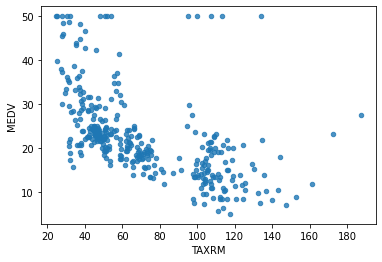

In [25]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [26]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [27]:
# to take care of missing inputs
median=housing["RM"].median()


In [28]:
median

6.3740000000000006

In [29]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.10995e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.37400e+00, 7.30000e+01, 3.12220e+00, 5.00000e+00, 3.35000e+02,
       1.85000e+01, 3.92315e+02, 1.01300e+01])

In [32]:
X=imputer.transform(housing)

In [33]:
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.553170,11.128713,10.833366,0.069307,0.564596,6.332703,69.487871,3.560887,9.299505,414.101485,18.016337,355.331757,11.890248
std,8.118696,19.798696,7.321413,0.254290,0.112790,0.698675,26.296331,1.922640,9.053023,166.907538,2.253782,96.134908,7.386877
min,0.006320,0.000000,1.210000,0.000000,0.389000,3.561000,6.000000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.055495,0.000000,3.440000,0.000000,0.488000,5.935750,53.600000,2.035975,4.000000,296.000000,15.300000,375.782500,5.172500
50%,0.210995,0.000000,9.900000,0.000000,0.538000,6.374000,73.000000,3.122200,5.000000,335.000000,18.500000,392.315000,10.130000
75%,3.731923,18.000000,18.100000,0.000000,0.631000,6.576000,93.300000,4.090000,24.000000,666.000000,20.200000,396.900000,16.222500
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [34]:
# Scikit Learn Design

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),])

#Feature Scaling

1. Min-max scaling- (normalization) -- (value-min)/(max-min)- scikit class called - MinMaxScaler
2. Standardization- (value-min)/std ------------------------- scykit class called - StandardScaler. It makes the variance as 1.

In [35]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [36]:
housing_num_tr.shape

(404, 13)

In [37]:
#Selecting the desired model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [38]:
some_data=housing.iloc[:5]

In [39]:
some_labels=housing_labels.iloc[:5]

In [40]:
prepared_data=my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([22.383     , 25.087     , 16.634     , 23.43749057, 23.51      ])

In [42]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse

1.1378020156369548

Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [45]:
rmse_scores

array([2.63133321, 2.61684815, 4.30595552, 2.05097005, 3.53163239,
       2.6727408 , 3.83648423, 2.97185195, 3.06790959, 3.04845859])

In [46]:
def print_scores(scores):
    print("scores: ",scores)
    print("mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [47]:
print_scores(rmse_scores)

scores:  [2.63133321 2.61684815 4.30595552 2.05097005 3.53163239 2.6727408
 3.83648423 2.97185195 3.06790959 3.04845859]
mean:  3.073418448111508
Standard deviation:  0.6270713864660873


In [48]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

In [54]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[23.65893724 11.097      25.36       22.256      24.31763579 16.386
 24.31763579 14.967      32.15       40.886      19.159      11.584
 24.947      31.01       19.915      10.812      31.336      24.31763579
 23.80349057 19.077      20.42       18.308      18.585      21.937
 18.313      31.583      16.158      34.409       8.574      34.145
 24.316      21.291      23.59505179 10.731      20.466      11.325
 42.727      24.31763579 22.911      42.471      24.432      31.186
 20.569      24.31763579 18.75       33.409      44.859      20.351
 20.055      20.603      20.926      24.31763579 21.592      15.427
 24.22891026 33.188      41.205      28.39211835 24.31763579 24.31763579
 46.509       9.812      19.404      27.129      14.957      33.169
 19.686      18.684      19.3        36.117      24.934      23.35963333
 21.365      22.478      36.907      13.052      15.761      20.428
 20.221      21.53       23.53449057 21.144      13.913      24.31763579
 24.31763579 21.368      13.

In [55]:
final_mse

8.284109311033689

In [57]:
prepared_data[0]

array([-0.43225242,  3.48289015, -0.98372896, -0.27288841, -1.53213338,
       -0.32201178, -1.42736088,  2.94721287, -0.91790289, -0.59448701,
       -0.71805555,  0.39116709, -0.72112263])

Using the model

In [58]:
from joblib import dump,load
import numpy as np
model=load('Dragon.joblib')

features=np.array([[-0.43225242,  3.48289015, -0.98372896, -0.27288841, -1.53213338,
       -0.32201178, -1.42736088,  2.94721287, -0.91790289, -0.59448701,
       -0.71805555,  0.39116709, -9.72112263]])
model.predict(features)

array([27.654])